# Distribution of unique key

In this section, the distribution of unique key like `subject_id` and `patient_id` are analyzed across all datasets.


In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils.helpers import find_csvs, get_indexes

# Analysis for mimic3

In [18]:
data_filepath = "../basic_filtered_data/mimic-iii-demo"
csv_files = find_csvs(data_filepath)


def get_unique_id(unique_key,files):
    res_df = []
    for file in files:
        df = pd.read_csv(file)
        
        if unique_key in df.columns:
            temp = df[unique_key].to_list()
            res_df.extend(temp)
    
    return list(set(res_df))

unique_column = "subject_id"

unique_keys = get_unique_id(unique_column,csv_files)

/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/3039487038.py:8: DtypeWarning: Columns (18,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/3039487038.py:8: DtypeWarning: Columns (9,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [19]:
unique_keys

[40456,
 42033,
 44083,
 40503,
 42066,
 42075,
 44154,
 40595,
 42135,
 40601,
 40612,
 44212,
 40124,
 44222,
 44228,
 40655,
 42199,
 43735,
 43746,
 43748,
 40687,
 40177,
 42231,
 43779,
 40204,
 43798,
 10006,
 10011,
 10013,
 10017,
 42275,
 10019,
 42281,
 10026,
 10027,
 10029,
 10032,
 10033,
 43827,
 42292,
 10035,
 10038,
 10036,
 10040,
 10042,
 10043,
 10044,
 10045,
 42302,
 10046,
 41795,
 10056,
 10059,
 10061,
 10064,
 42321,
 10065,
 10067,
 40277,
 10069,
 10074,
 10076,
 43870,
 40286,
 10083,
 43879,
 10088,
 43881,
 42346,
 10090,
 10089,
 10093,
 10094,
 40304,
 10098,
 10101,
 40310,
 10102,
 10104,
 10106,
 42367,
 10111,
 10112,
 10114,
 43909,
 10117,
 10119,
 10120,
 10124,
 10126,
 10127,
 10130,
 10132,
 43927,
 42412,
 41914,
 42430,
 42458,
 41976,
 41983]

In [20]:
def get_appeared_boolean(subject_id,files):
    """_summary_

    :param _type_ subject_id: _description_
    :param _type_ files: _description_
    :return _type_: _description_
    """
    res = dict()
    
    for id in subject_id:
        matches = dict()
        for file in files:
            df = pd.read_csv(file)
    
            if "subject_id" in df.columns:
                boolean_value = int(id in df["subject_id"].values) 
            else:
                # the table doesn't contain "subject_id"
                boolean_value = 0
                
            matches[file] = boolean_value

        res[id] = np.mean(list(matches.values()))

        
    return res

subject_frequency = get_appeared_boolean(subject_id = unique_keys,
                          files = csv_files)


/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/2381228022.py:13: DtypeWarning: Columns (18,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/2381228022.py:13: DtypeWarning: Columns (9,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/2381228022.py:13: DtypeWarning: Columns (18,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/2381228022.py:13: DtypeWarning: Columns (9,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/2381228022.py:13: DtypeWarning: Columns (18,21,22) have mixed types. Sp

In [21]:
series = pd.Series(subject_frequency)
series

40456    0.68
42033    0.72
44083    0.72
40503    0.68
42066    0.72
         ... 
41914    0.72
42430    0.68
42458    0.64
41976    0.72
41983    0.60
Length: 100, dtype: float64

In [22]:
series.loc[series.index < 25000].describe()

count    50.000000
mean      0.604000
std       0.059522
min       0.400000
25%       0.600000
50%       0.600000
75%       0.640000
max       0.680000
dtype: float64

In [23]:
series.loc[series.index > 25000].describe()

count    50.000000
mean      0.700000
std       0.028284
min       0.600000
25%       0.680000
50%       0.720000
75%       0.720000
max       0.720000
dtype: float64

In [24]:
series.loc[series.index < 25000].describe()


count    50.000000
mean      0.604000
std       0.059522
min       0.400000
25%       0.600000
50%       0.600000
75%       0.640000
max       0.680000
dtype: float64

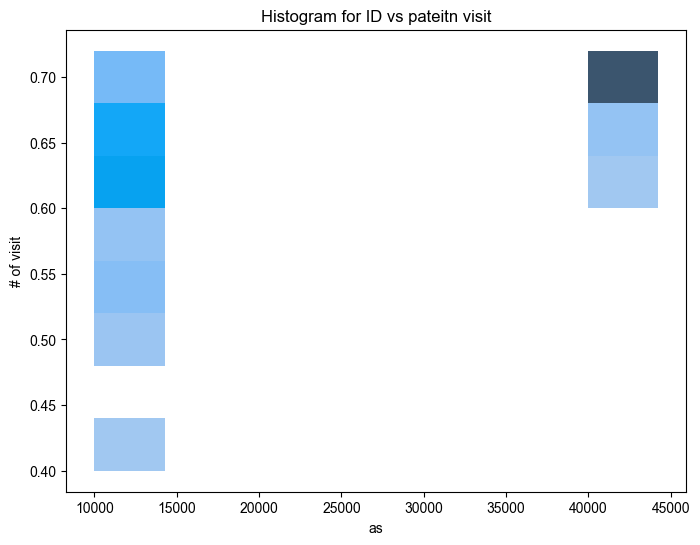

In [7]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
series = pd.Series(subject_frequency)

filterd_series = series.loc[series < 10]

sns.histplot(series, 
             x = series.index,
             y = series.values,
             ax=ax,
             kde=False,
             color="#008fd5")

# Add labels and title
ax.set_xlabel("as")
ax.set_ylabel('# of visit')
ax.set_title('Histogram for ID vs pateitn visit')

# Customize the style
sns.set_style("darkgrid")
sns.set_palette("husl")

# Show the plot
plt.show()


Text(0.5, 0, 'subject_id')

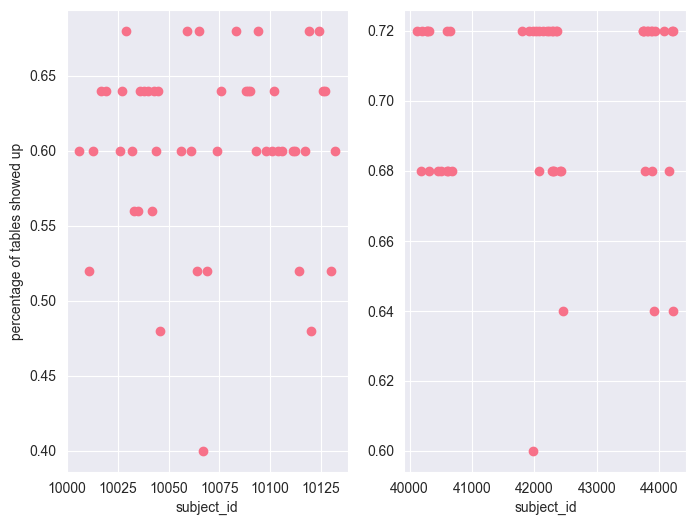

In [8]:
# Create a figure and axes
fig, (ax1,ax2) = plt.subplots(figsize=(8, 6),nrows =1, ncols=2)

# Plot the histogram
series = pd.Series(subject_frequency)



ax1.scatter(series.loc[series.index < 25000].index,
        series.loc[series.index < 25000].values)

ax2.scatter(series.loc[series.index > 25000].index,
        series.loc[series.index > 25000].values)


ax1.set_xlabel("subject_id")
ax1.set_ylabel("percentage of tables showed up")

ax2.set_xlabel("subject_id")

# Analysis for mimic4

In [10]:
result_csv = []
for filepath in ["../basic_filtered_data/mimic-iv-demo/hosp",
                 "../basic_filtered_data/mimic-iv-demo/icu",
                 "../basic_filtered_data/mimic-iv-ed-demo"]:

    result_csv.extend(find_csvs(filepath))



def get_unique_id(unique_key,files):
    res_df = []
    for file in files:
        df = pd.read_csv(file)
        
        if unique_key in df.columns:
            temp = df[unique_key].to_list()
            res_df.extend(temp)
    
    return list(set(res_df))

unique_column = "subject_id"

unique_keys = get_unique_id(unique_column,result_csv)

In [11]:
unique_keys

[10020740,
 10014729,
 10022281,
 10004235,
 10026255,
 10007058,
 10014354,
 10005909,
 10018328,
 10022041,
 10039708,
 10018845,
 10020640,
 10018081,
 10021666,
 10000032,
 10026406,
 10015272,
 10037928,
 10016810,
 10029484,
 10035631,
 10021938,
 10006580,
 10012853,
 10019385,
 10015931,
 10019003,
 10001725,
 10039997,
 10019777,
 10001217,
 10018501,
 10023239,
 10018423,
 10003400,
 10023117,
 10020944,
 10027602,
 10020306,
 10017492,
 10032725,
 10038999,
 10009049,
 10040025,
 10020187,
 10037861,
 10016742,
 10010471,
 10004457,
 10005866,
 10029291,
 10021487,
 10004720,
 10019568,
 10026354,
 10002930,
 10015860,
 10007795,
 10010867,
 10025463,
 10007928,
 10002428,
 10014078]

In [12]:
subject_frequency = get_appeared_boolean(subject_id = unique_keys,
                          files = csv_files)

/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/2381228022.py:13: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,17,18,19,22,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/2381228022.py:13: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,17,18,19,22,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/2381228022.py:13: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,17,18,19,22,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_40929/2381228022.py:13: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,17,18,19,22,24,25,26,27,28,29,30,31,32,33) have mixed type

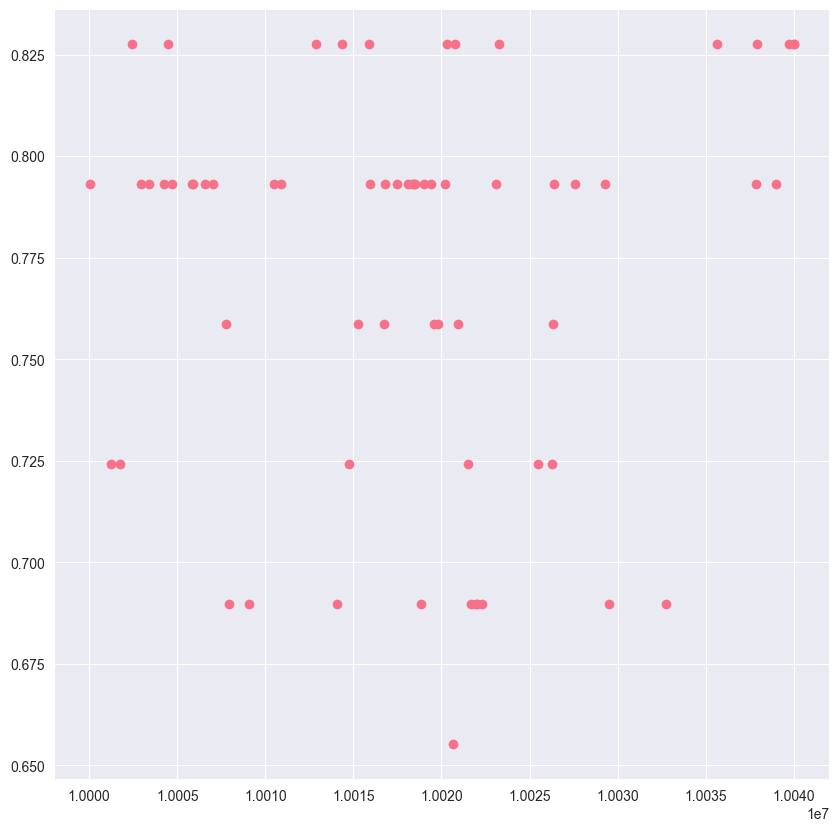

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

series = pd.Series(subject_frequency)

ax.scatter(series.index,
           series.values)

In [17]:
series.describe()

count    64.000000
mean      0.771552
std       0.048572
min       0.655172
25%       0.724138
50%       0.793103
75%       0.793103
max       0.827586
dtype: float64